In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Importing some practice data

## A) Heartbeat audio files

In [2]:
# source: https://www.kaggle.com/kinguistics/heartbeat-sounds#set_a.csv
import librosa as lr
from glob import glob
data_dir= '../data/set_a'
# List all the wav files in the folder
normal = glob(data_dir + '/normal*.wav')
abnormal = glob(data_dir + '/extrahls*.wav') # picking just one category of abnormal beats

* creating a time array from the sampling frequency
    - method 1: 
        indices = np.arange(0,len(audio)) <br>
        time = indices/sfreq
    - method 2: 
        final_time = (len(audio) - 1) /sfreq <br>
        time = np.linspace(0,final_time,sfreq)

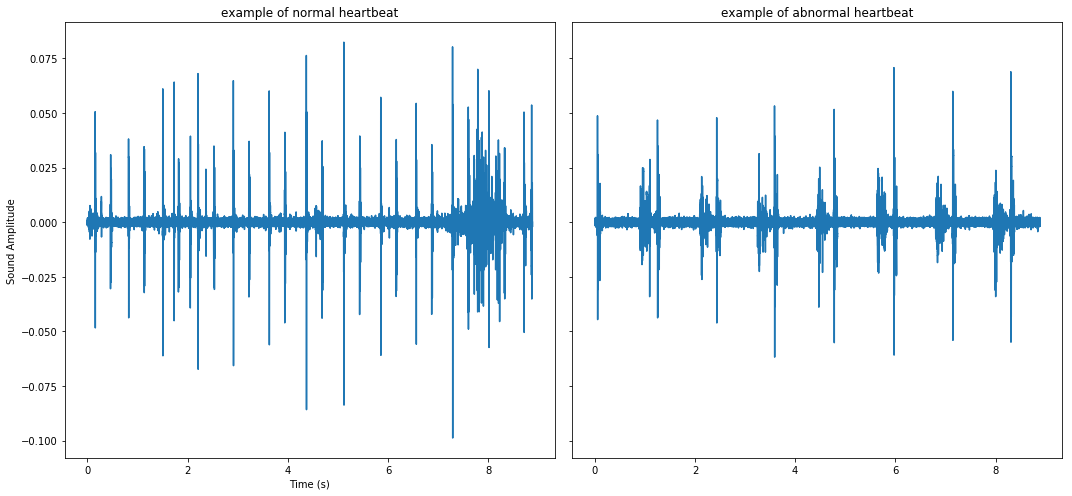

In [3]:
# Read in the first audio file, create the time array
expl_normal, sfreq_normal = lr.load(normal[0]) 
time_normal = np.arange(0, len(expl_normal)) / sfreq_normal
expl_abnormal, sfreq_abnormal = lr.load(abnormal[0])
time_abnormal = np.arange(0, len(expl_abnormal)) / sfreq_abnormal

# Plot examples of both heartbeat types over time
fig, axs = plt.subplots(1,2,figsize=(15, 7),sharex=True, sharey=True)
axs[0].plot(time_normal, expl_normal)
axs[0].set(xlabel='Time (s)', ylabel='Sound Amplitude',title='example of normal heartbeat')
axs[1].plot(time_abnormal, expl_abnormal)
axs[1].set(title='example of abnormal heartbeat')

plt.tight_layout()
plt.show()

In [44]:
# Saving and plotting 5 examples of each type
audio_normal = pd.DataFrame()#columns = ['N1', 'N2', 'N3', 'N4', 'N5'])#index = list(range(expl_normal.shape[0])))
audio_abnormal = pd.DataFrame()#columns = ['A1', 'A2', 'A3', 'A4', 'A5'])#index = list(range(expl_abnormal.shape[0])))
for i in range(5):
    file_normal, sr_normal = lr.load(normal[i],sr=None)
    time_normal = np.arange(0, len(file_normal)) / sr_normal
    nname= 'N' + str(i+1)
    audio_normal = pd.concat([audio_normal,pd.Series(file_normal, index = time_normal,name=nname)],axis = 1)
    file_abnormal, sr_abnormal = lr.load(abnormal[i],sr=None)
    aname= 'A' + str(i+1)
    time_abnormal = np.arange(0, len(file_abnormal)) / sr_abnormal
    audio_abnormal = pd.concat([audio_abnormal,pd.Series(file_abnormal,index = time_abnormal,name=aname)],axis=1)

sfreq = sr_normal # useful for later

In [45]:
audio_abnormal.head()

,A1,A2,A3,A4,A5
0.000000,0.001129,0.000000,0.000000,-0.005096,0.014496
0.000023,0.000763,0.000427,0.000000,-0.006012,0.014099
0.000045,0.000854,0.000549,0.000244,-0.006439,0.013489
0.000068,0.000854,0.000000,0.000031,-0.005890,0.014130
0.000091,0.000153,-0.000092,0.000153,-0.005737,0.014221


In [46]:
time_max = np.arange(max(audio_normal.shape[0],audio_abnormal.shape[0]))

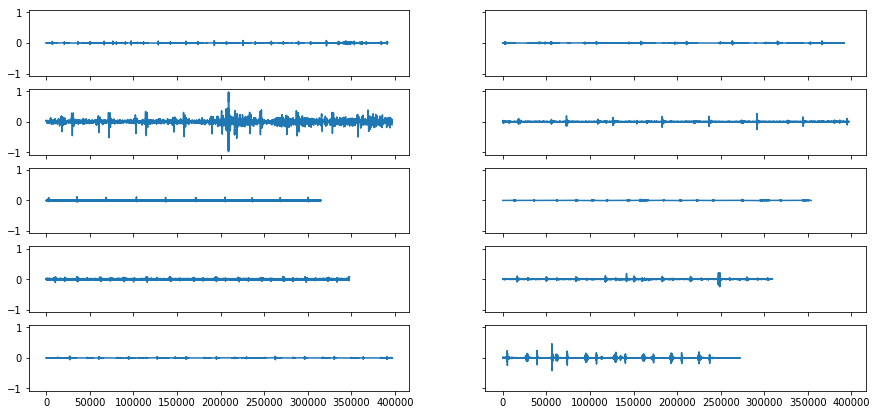

In [47]:
fig, axs = plt.subplots(5, 2, figsize=(15, 7), sharex=True, sharey=True)
# Stack the normal/abnormal audio to loop and plot
stacked_audio = np.hstack([audio_normal, audio_abnormal]).T
# Loop through each audio file / ax object and plot
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time_max, iaudio)

In [48]:
# putting normal and abnormal heartbeats in one dataframe
audio = pd.concat([audio_normal,audio_abnormal],axis=1)

The audios don't have the same length --> dataframe includes nans. These are dropped here to make the example analyses easier (might not be done in a serious analysis due to loss of data)

In [49]:
audio.dropna(inplace=True)
audio.tail(5)

,N1,N2,N3,N4,N5,A1,A2,A3,A4,A5
6.167007,0.031189,-0.034332,-0.000549,-0.018158,0.000214,0.000031,0.000885,0.000122,-0.016479,0.000031
6.167029,0.030579,-0.034149,-0.001495,-0.018280,-0.000214,-0.000488,0.001648,0.000122,-0.017181,-0.000122
6.167052,0.030182,-0.034668,-0.005280,-0.019501,0.000671,0.000122,0.002167,-0.000153,-0.018127,0.000153
6.167075,0.029846,-0.035706,-0.005371,-0.020966,0.000000,-0.000458,0.002563,0.000336,-0.018280,-0.000214
6.167098,0.029114,-0.036316,-0.003326,-0.022858,0.000183,0.000427,0.002411,0.000244,-0.019501,-0.000488


## B) Stock prices from kaggle

In [10]:
# source: https://www.kaggle.com/dgawlik/nyse
# Read in the data
stock_data_all = pd.read_csv('../data/prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
stock_data_all.index =pd.to_datetime(stock_data_all.index)
print(stock_data_all.head())

           symbol        open       close         low        high     volume
date                                                                        
2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0
2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500.0
2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300.0
2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600.0


#### There are 501 different stocks. Let's just choose 5 of them.

In [11]:
print(stock_data_all['symbol'].nunique()) 
stock_data = stock_data_all[stock_data_all['symbol'].isin(['AAPL','AMZN', 'EBAY','GOOGL', 'NVDA'])]
print(stock_data.head())

501
           symbol        open       close         low        high       volume
date                                                                          
2010-01-04   AAPL  213.429998  214.009998  212.380001  214.499996  123432400.0
2010-01-04   AMZN  136.250000  133.899994  133.139999  136.610001    7599900.0
2010-01-04   EBAY   23.719999   23.900000   23.619999   23.979998   22511600.0
2010-01-04  GOOGL  626.950006  626.750011  624.240011  629.510005    3908400.0
2010-01-04   NVDA   18.510000   18.490000   18.110001   18.620001   20005100.0


#### Transforming the dataframe: stock symbols as columns, 'close' values for each timepoint

In [12]:
stock_data = stock_data.pivot(columns ='symbol',values='close')

In [13]:
stock_data.head()

symbol,AAPL,AMZN,EBAY,GOOGL,NVDA
date,,,,,
2010-01-04,214.009998,133.899994,23.900000,626.750011,18.490000
2010-01-05,214.379993,134.690002,23.650000,623.990017,18.760000
2010-01-06,210.969995,132.250000,23.500000,608.260035,18.879999
2010-01-07,210.580000,130.000000,23.229998,594.100015,18.510000
2010-01-08,211.980005,133.520004,23.509999,602.020005,18.549999


In [14]:
# another dataframe with stock returns (returns = percent change in prices)
stock_pct = stock_data.pct_change().dropna() 
# advantages: better comparability, better suited for some analyses)
stock_pct.head()

symbol,AAPL,AMZN,EBAY,GOOGL,NVDA
date,,,,,
2010-01-05,0.001729,0.005900,-0.010460,-0.004404,0.014602
2010-01-06,-0.015906,-0.018116,-0.006342,-0.025209,0.006397
2010-01-07,-0.001849,-0.017013,-0.011489,-0.023280,-0.019597
2010-01-08,0.006648,0.027077,0.012053,0.013331,0.002161
2010-01-11,-0.008822,-0.024041,-0.002552,-0.001512,-0.014016


# Plotting time series

#### Plotting the values of all stocks over time

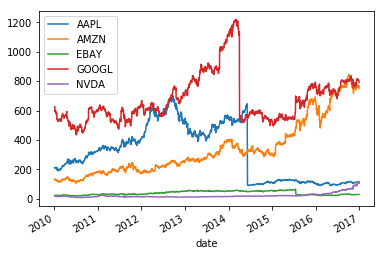

In [15]:
# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in stock_data.columns:
    stock_data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

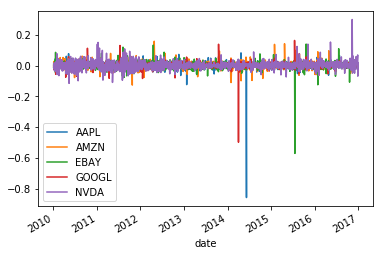

In [16]:
# plot pct changes
fig, ax = plt.subplots()
for column in stock_pct.columns:
    stock_pct[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

#### Plotting timeseries in separate plots

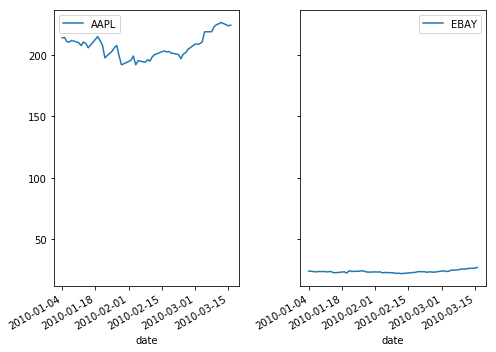

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(7, 5),sharex=True,sharey=True)
plt.xticks(rotation=70)
stock_data.iloc[:50,:].plot(y='AAPL',ax=axs[0])
stock_data.iloc[:50,:].plot(y='EBAY', ax=axs[1])
plt.tight_layout()
plt.show()

##### plot using plt:
fix, ax = plt.subplots() <br>
ax.plot(...) <br>
##### plot using pandas:
fig, ax = plt.subplots() <br>
df.plot(..,ax=ax) <br>
#### useful combinations with groupby:
df.groupby("country")['unemployment'].mean().plot(kind='bar') <br>
fig, ax = plt.subplots() <br>
df.groupby('country').plot(x='year', y='unemployment')

# Generally useful functions

In [18]:
df = stock_data.copy() # df just for testing the functions
df['date'] = df.index

In [19]:
df.index = pd.to_datetime(df.index) # converting an index to datetime
df['date'] = pd.to_datetime(df['date']) # converting a column to datetime
df.head(10)

symbol,AAPL,AMZN,EBAY,GOOGL,NVDA,date
date,,,,,,
2010-01-04,214.009998,133.899994,23.900000,626.750011,18.490000,2010-01-04
2010-01-05,214.379993,134.690002,23.650000,623.990017,18.760000,2010-01-05
2010-01-06,210.969995,132.250000,23.500000,608.260035,18.879999,2010-01-06
2010-01-07,210.580000,130.000000,23.229998,594.100015,18.510000,2010-01-07
2010-01-08,211.980005,133.520004,23.509999,602.020005,18.549999,2010-01-08
2010-01-11,210.110003,130.309998,23.450000,601.110027,18.290001,2010-01-11
2010-01-12,207.720001,127.349998,23.190000,590.479981,17.670000,2010-01-12
2010-01-13,210.650002,129.110001,23.600000,587.090003,17.910000,2010-01-13
2010-01-14,209.430000,127.349998,22.880000,589.849997,17.629999,2010-01-14


In [20]:
# slicing df with datetime index
df['2012'].head()

symbol,AAPL,AMZN,EBAY,GOOGL,NVDA,date
date,,,,,,
2012-01-03,411.230000,179.029999,31.340000,665.409982,14.04,2012-01-03
2012-01-04,413.440010,177.509995,30.159999,668.280034,14.20,2012-01-04
2012-01-05,418.029995,177.610001,30.709999,659.010017,14.71,2012-01-05
2012-01-06,422.400002,182.610001,30.629998,650.019992,14.54,2012-01-06
2012-01-09,421.730000,178.559998,30.509999,622.459994,14.54,2012-01-09


In [21]:
df = df.resample(rule='W').last() # downsample from daily to weekly data
df.head()

symbol,AAPL,AMZN,EBAY,GOOGL,NVDA,date
date,,,,,,
2010-01-10,211.980005,133.520004,23.509999,602.020005,18.549999,2010-01-08
2010-01-17,205.930000,127.139999,22.469998,579.999993,17.110001,2010-01-15
2010-01-24,197.750000,121.430000,23.579998,550.009993,16.459999,2010-01-22
2010-01-31,192.060003,125.410004,23.019999,529.939995,15.390000,2010-01-29
2010-02-07,195.460001,117.389999,22.709999,531.290023,16.219999,2010-02-05


In [22]:
df.drop('date',axis=1,inplace=True)

In [23]:
diff = df.diff() 
#Calculates the difference of a DataFrame element compared with another element in 
#the DataFrame (default is the element in the same column of the previous row).

In [24]:
# correlations of two series
print(df['AAPL'].corr(df['AMZN']))
# autocorrelation
print(df['AMZN'].autocorr())

-0.5335087136006192
0.9968460236280333


Never computer correlation of two time series (e.g. stock prices), but instead use their returns!

In [25]:
changes = df.pct_change().dropna()
correlation = changes['AAPL'].corr(changes['AMZN'])
print(correlation)
print(changes['AMZN'].autocorr())

0.2782691465771814
-0.013560579100085431


# Basics about time series
* amount of time between timestamps = "period" of the time series

# Classification of audio files
First models and feature engineering
* useful to get an intuition about class differences: averaging across multiple instances of the same class --> may remove noise and reveal underlying patterns
* simplest model: just feeding in the raw data by using each instance as a datapoint, and each time point as a feature to fit a classifier (X = instances * timepoints matrix). Not recommended as this doesn't usually work well
* smootheing of time series: use a rolling window statistic (e.g. taking the rolling mean in a window of 50 samples)
* calculating the *auditory envelope*:
    - first rectify the audio (taking absolute value of each timepoint), then smooth it

In [27]:
# shape of audio: n_timepoints, n_audio_files
# rectifying
audio_rectified = audio.apply(np.abs)
# smoothing
window_size = 50 
windowed = audio_rectified.rolling(window=window_size)
audio_envelope = windowed.mean()

In [28]:
# Calculating several features of the envelope, one per sound
envelope_mean = np.mean(audio_envelope, axis=0)
envelope_std = np.std(audio_envelope, axis=0)
envelope_max = np.max(audio_envelope, axis=0)

More advanced feature engineering: many options in librosa. Also: tsfresh!
* librosa functions operate on numpy arrays! --> add .values on pandas df
* e.g. tempogram: estimates the tempo over time
* summary stats of the tempogram can be calculated the same way as for the envelope

In [32]:
# audio shape = time * n_samples
# Calculate the tempo of the sounds
sfreq = 44100
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array to manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

In [34]:
envelope_mean.shape

(10,)

In [35]:
# stacking the created features together to feed them into sklearn
X = np.column_stack([envelope_mean, envelope_std, envelope_max, tempos_mean, tempos_std, tempos_max])
labels = np.array(([0,0,0,0,0,1,1,1,1,1])) # 0 = normal, 1 = abnormal heartbeat
y = labels

### Evaluating the model
function cross_val_score repeatedly splits data into trainig/val, fits the model on the training data and scores it on the val data

Important for timeseries: DON'T SHUFFLE your data, as timepoints are not independent from one another!

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
model = LinearSVC()
scores = cross_val_score(model, X, y, cv = 3) # cv determines number of splits made.
# cv cannot be greater than the number of members in each class
print(scores)

[0.25 0.5  0.5 ]


#### KFold cross validation: splits data in multiple folds of equal size

In [37]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# only for practice (doesn't make sense): predicting ebay stock price from amzn and apple stock prices
X = stock_data[['AMZN','AAPL']]
y = stock_data[['EBAY']]
cv = KFold(n_splits=5, shuffle = False)
model = LinearRegression()

results = []
for tr, tt in cv.split(X, y): # split returns training and test indices for split
    # Plot the indices chosen for validation on each loop
    model.fit(X.iloc[tr],y.iloc[tr])
    prediction = model.predict(X.iloc[tt])
    score = r2_score(y.iloc[tt],prediction)
    results.append((prediction,score,tt))

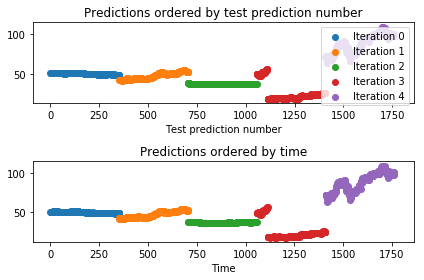

In [38]:
fig, axs = plt.subplots(2, 1)
for ii, (prediction, score, tt)in enumerate(results):
    offset = len(prediction) * ii
    axs[0].scatter(np.arange(len(prediction)) + offset, prediction, label = 'Iteration {}'.format(ii))
    axs[1].scatter(tt, prediction)

# Add labels
axs[0].legend(loc='best')
axs[0].set(xlabel='Test prediction number', title='Predictions ordered by test prediction number')
axs[1].set(xlabel='Time', title='Predictions ordered by time')
plt.tight_layout()
plt.show()

#### TimeSeriesSplit
* always uses training data from the past to predict the future (never vice versa)
* size of training set grows for each iteration!

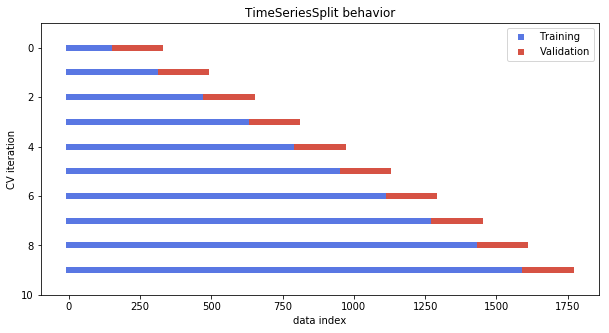

In [39]:
# Import and initialize the cross-validation iterator
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=10)

fig, ax = plt.subplots(figsize=(10, 5))
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot training and test indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)], 
                    marker='_', lw=6)
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)], 
                    marker='_', lw=6)
    ax.set(ylim=[10, -1], title='TimeSeriesSplit behavior', 
           xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

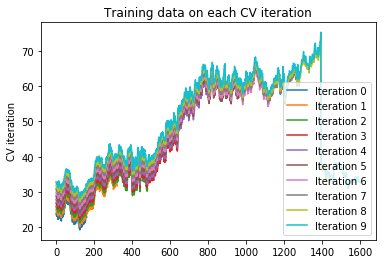

In [40]:
# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X,y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y.iloc[tr], label = 'Iteration {}'.format(ii))

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
ax.legend(loc="best")
plt.show()

#### Custom correlation function

In [41]:
def my_pearsonr(est, X, y):
    # Generate predictions and convert to a vector 
    y_pred = est.predict(X).squeeze()

    # Use the numpy "corrcoef" function to calculate a correlation matrix
    my_corrcoef_matrix = np.corrcoef(y_pred, y.squeeze())

    # Return a single correlation value from the matrix
    my_corrcoef = my_corrcoef[1, 0]
    return my_corrcoef

### Spectograms
* Fourier Transform describes relative presence of fast and slow-moving components of a time series --> time series as a combination of oscillations
     - x-axis: frequency, y-axis: FFT amplitutdes (db)
* Spectogram = collection of windowed Fourier transforms over time (FFT is calculated for a window, window is slid over by one, FFT is calculated again etc., at the end results are aggregated)  --> Short-Time Fourier Transform (STFT). To calculate the spectogram, each value of the FFT is *squared*. Resulting diagram has time on the x-axis, Hz on the y-axis
* spectral bandwidth and spectral centroids describe where most of the energy is at each moment in time
* STFT parameters:
    - window size
    - FFT size
    - hop size...

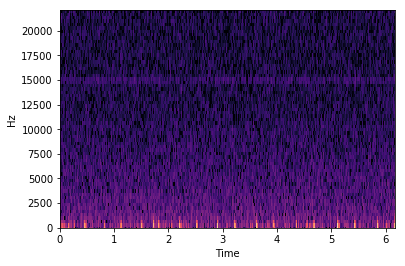

In [52]:
# STFT with librosa, then convert in decibels to normalize the average values of all frequencies
# visualization with specshow()
from librosa.core import stft, amplitude_to_db
from librosa.display import specshow

audio_expl = np.array(audio.iloc[:,0])
# Calculate our STFT
HOP_LENGTH = 2**4
SIZE_WINDOW = 2**7
audio_stft = stft(audio_expl, hop_length=HOP_LENGTH, n_fft=SIZE_WINDOW)

# Convert into decibels for visualization
spec_db = amplitude_to_db(np.abs(audio_stft))

# Visualize
specshow(spec_db, sr=sfreq, x_axis='time', 
         y_axis='hz', hop_length=HOP_LENGTH)

In [64]:
spec_db.shape

(65, 16999)

In [54]:
# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec_db)[0]
centroids = lr.feature.spectral_centroid(S=spec_db)[0]

# Display these features on top of the spectrogram
ax = specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, 
                centroids + bandwidths / 2, alpha=0.5)
plt.show()

ParameterError: Spectral bandwidth is only defined with non-negative energies

In [ ]:
# combining all of the features
centroids_all = []
bandwidths_all = []
for spec in spectrograms:
    bandwidths = lr.feature.spectral_bandwidth(S=lr.db_to_amplitude(spec))
    centroids = lr.feature.spectral_centroid(S=lr.db_to_amplitude(spec))
    # Calculate the mean spectral bandwidth
    bandwidths_all.append(np.mean(bandwidths))  
    # Calculate the mean spectral centroid
    centroids_all.append(np.mean(centroids))  

# Create our X matrix
X = np.column_stack([means, stds, maxs, tempo_mean, 
                     tempo_max, tempo_std, bandwidths_all, centroids_all])

## Regression analysis

The magnitude of the correlation is the square root of the R-squared

In [ ]:
# Import the statsmodels module
import statsmodels.api as sm
# Convert the Series x to a DataFrame and name the column x
x = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame x
x = sm.add_constant(x)

# Fit the regression of y on x
result = sm.OLS(y,x).fit(())

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

### Visualizing relationships between timeseries

In [ ]:
fig, axs = plt.subplots(1, 2)

# Make a line plot for each timeseries
axs[0].plot(x, c='k', lw=3, alpha=.2)
axs[0].plot(y)
axs[0].set(xlabel='time', title='X values = time')

# Encode time as color in a scatterplot
axs[1].scatter(x_long, y_long, c=np.arange(len(x_long)), cmap='viridis')
axs[1].set(xlabel='x', ylabel='y', title='Color = time')

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
### Ridge regression 
alphas = [.1, 1e2, 1e3]
ax.plot(y_test, color='k', alpha=.3, lw=3)
for ii, alpha in enumerate(alphas):
    y_predicted = Ridge(alpha=alpha).fit(X_train, y_train).predict(X_test)
    ax.plot(y_predicted, c=cmap(ii / len(alphas)))
ax.legend(['True values', 'Model 1', 'Model 2', 'Model 3'])
ax.set(xlabel="Time")

NameError: name 'y_test' is not defined

In [ ]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

### Cleaning messy timeseries data

#### Handling missing values

In [ ]:
stock_data.loc[17:340,'AMZN'] = np.nan

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
# Return a boolean that notes where missing values are
missing = stock_data['AMZN'].isna()
# print("missing:", missing)
# Interpolate linearly within missing windows
amzn_data_interp = stock_data['AMZN'].interpolate('linear') #'zero': use latest non-missing value
# Plot the interpolated data in red and the data w/ missing values in black
ax = amzn_data_interp.plot(c='r')
#amzn_data_interp[missing].plot(ax=ax, color='r', lw=3, legend=False) # alternative
stock_data['AMZN'].plot(c='k', ax=ax, lw=2)
plt.show()

In [ ]:
stock_data['AMZN'] = stock_data['AMZN'].interpolate('linear')

#### Transforming the data
* one common way: standardize mean and variance over time --> each point represents the %change over a previous window
    --> makes timepoints more comparable if data fluctuates a lot
    --> reduces long-term drift

In [66]:
def percent_change(values):
    """Calculates the % change between the last value 
    and the mean of previous values"""
    # Separate the last value and all previous values into variables
    previous_values = values[:-1]
    last_value = values[-1]#

    # Calculate the % difference between the last value 
    # and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) \
    / np.mean(previous_values)
    return percent_change

In [67]:
stock_data.head()

symbol,AAPL,AMZN,EBAY,GOOGL,NVDA
date,,,,,
2010-01-04,214.009998,133.899994,23.900000,626.750011,18.490000
2010-01-05,214.379993,134.690002,23.650000,623.990017,18.760000
2010-01-06,210.969995,132.250000,23.500000,608.260035,18.879999
2010-01-07,210.580000,130.000000,23.229998,594.100015,18.510000
2010-01-08,211.980005,133.520004,23.509999,602.020005,18.549999


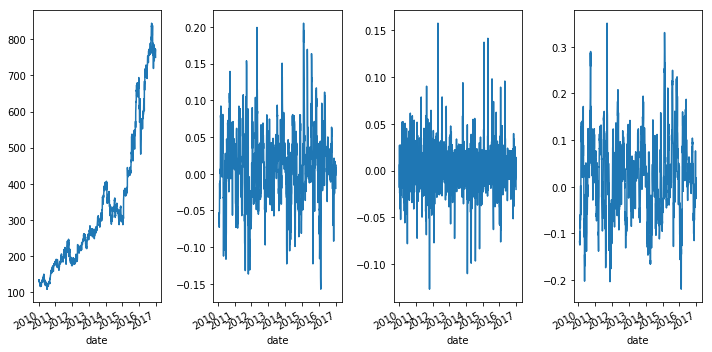

In [72]:
# Plot the raw data
fig, axs = plt.subplots(1, 4, figsize=(10, 5))
ax = stock_data['AMZN'].plot(ax=axs[0])

# Calculate % change and plot
ax = stock_data['AMZN'].rolling(window=20).aggregate(percent_change).plot(ax=axs[1])

# another variant, calculating pct change for each point
# is the same as using window = 2 above
ax = stock_data['AMZN'].pct_change().plot(ax=axs[2])

ax = stock_data['AMZN'].pct_change(20).plot(ax=axs[3])
plt.tight_layout()

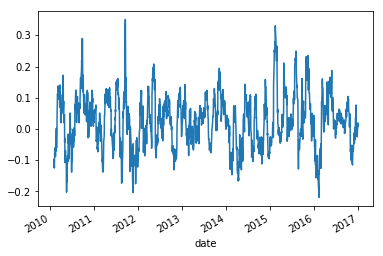

In [69]:
stock_data['AMZN'].pct_change(20).plot()

#### Finding outliers

NameError: name 'percent_change' is not defined

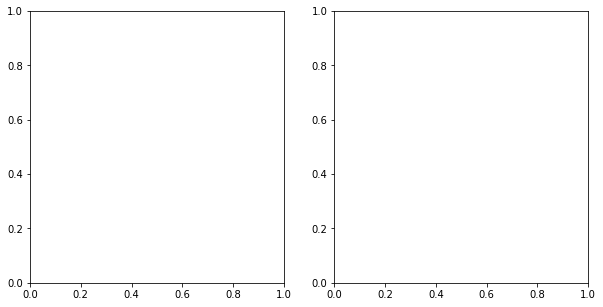

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
amzn = stock_data['AMZN']
amzn_perc = stock_data['AMZN'].rolling(window=20).aggregate(percent_change)
for data, ax in zip([amzn, amzn_perc], axs):
    # Calculate the mean / standard deviation for the data
    this_mean = data.mean()
    this_std = data.std()

    # Plot the data, with a window that is 3 standard deviations 
    # around the mean
    data.plot(ax=ax)
    ax.axhline(this_mean + this_std * 3, ls='--', c='r')
    ax.axhline(this_mean - this_std * 3, ls='--', c='r')

#### Replacing outliers by median values

In [ ]:
# Center the data so the mean is 0
amzn_centered = amzn_perc - amzn_perc.mean()

# Calculate standard deviation
std = amzn_perc.std()

# Use the absolute value of each datapoint 
# to make it easier to find outliers
outliers = np.abs(amzn_centered) > (std * 3)

# Replace outliers with the median value
# We'll use np.nanmean since there may be nans around the outliers
amzn_fixed = amzn_centered.copy()
amzn_fixed[outliers] = np.nanmedian(amzn_fixed)
amzn_fixed.plot()

In [ ]:
amzn_perc.dropna(inplace=True)
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) *3)
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
amzn_perc_new = amzn_perc.aggregate(replace_outliers)
amzn_perc_new.plot()
plt.show()

#### Using aggregate to calculate many features for a window at once

In [ ]:
apple = stock_data['AAPL']
# Calculate a rolling window, then extract two features
feats = apple.rolling(20).aggregate([np.std, np.max]).dropna()
print(feats.head(3))

#### combining partial() and np.percentile()

In [ ]:
# using partial()
# If we just take the mean, it returns a single value
a = np.array([[0, 1, 2], [0, 1, 2], [0, 1, 2]])
print(np.mean(a))

# We can use the partial function to initialize np.mean 
# with an axis parameter
from functools import partial
mean_over_first_axis = partial(np.mean, axis=0)

print(mean_over_first_axis(a))

In [ ]:
np.percentile(apple, q = 75)

In [ ]:
percentiles = [10, 50, 75]
# Create a list of functions using a list comprehension
percentile_funcs = [partial(np.percentile, q=ii) for ii in percentiles]

# Calculate multiple percentiles of a rolling window
feat = apple_perc.rolling(20).aggregate(percentile_funcs)

# Plot a subset of the result
ax = feat.plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

#### Extracting serveral features at once

In [ ]:
apple_perc = apple.rolling(window=20).aggregate(percent_change).dropna()
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
apple_perc_rolling = apple_perc.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max,np.mean, np.std]

# Calculate these features for your rolling window object
features = apple_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot()
apple_perc.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

#### Extracting datetime features
it is necessary to have a datetime index for this!

In [251]:
# Extract date features from the data, add them as columns
stock_data['day_of_week'] = stock_data.index.weekday
stock_data['week_of_year'] = stock_data.index.weekofyear
stock_data['month_of_year'] = stock_data.index.month
stock_data.tail(30)

symbol,AAPL,AMZN,EBAY,GOOGL,NVDA,date,day_of_week,week_of_year,month_of_year
date,,,,,,,,,
2016-11-17,109.949997,756.400024,28.870001,786.159973,92.389999,2016-11-17,3,46,11
2016-11-18,110.059998,760.159973,28.690001,775.969971,93.360001,2016-11-18,4,46,11
2016-11-21,111.730003,780.000000,29.000000,784.799988,92.980003,2016-11-21,0,47,11
2016-11-22,111.800003,785.330017,29.059999,785.000000,93.650002,2016-11-22,1,47,11
2016-11-23,111.230003,780.119995,28.900000,779.000000,93.970001,2016-11-23,2,47,11
2016-11-25,111.790001,780.369995,28.950001,780.229980,94.160004,2016-11-25,4,47,11
2016-11-28,111.570000,766.770020,28.570000,785.789978,94.110001,2016-11-28,0,48,11
2016-11-29,111.459999,762.520020,28.510000,789.440002,93.250000,2016-11-29,1,48,11
2016-11-30,110.519997,750.570007,27.809999,775.880005,92.199997,2016-11-30,2,48,11


In [252]:
# important before using the features in models: convert them to dummy variables!
# Monday column is dropped here as it can be inferred from the other columns!
days_of_week = pd.get_dummies(stock_data.index.dayofweek,prefix='weekday',drop_first=True)

In [253]:
days_of_week.head()

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


#### ParameterGrid to help find the right hyperparameters for a model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=200,
                                      max_depth=5,
                                      max_features=4,
                                      random_state=42)
random_forest.fit(train_features, train_targets)
print(random_forest.score(train_features, train_targets))

In [ ]:
from sklearn.model_selection import ParameterGrid

grid = {'n_estimators': [200], 'max_depth':[3, 5], 'max_features': [4, 8]}

from pprint import pprint

pprint(list(ParameterGrid(grid)))

# result like: 
# [{'max_depth': 3, 'max_features': 4, 'n_estimators': 200},
# {'max_depth': 3, 'max_features': 8, 'n_estimators': 200},
# {'max_depth': 5, 'max_features': 4, 'n_estimators': 200},
# {'max_depth': 5, 'max_features': 8, 'n_estimators': 200}]

In [ ]:
test_scores = []

# loop through the parameter grid, set hyperparameters, save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx])
print(ParameterGrid(grid)[best_idx])

In [ ]:
#### plotting feature importance

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(train_features, train_targets)

feature_importances = random_forest.feature_importances_

print(feature_importances)

# feature importances from random forest model
importances = random_forest.feature_importances_

# index of greatest to least feature importances
sorted_index = np.argsort(importances)[::-1]

x = range(len(importances))
# create tick labels
labels = np.array(feature_names)[sorted_index]

plt.bar(x, importances[sorted_index], tick_label=labels)

# rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

Fitting a gradient boosting model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)

gbr.fit(train_features, train_targets)

Making a train and test set

import statsmodels.api as sm
linear_features = sm.add_constant(features)
train_size = int(0.85 * targets.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]

model = sm.OLS(train_targets, train_features)
results = model.fit()
print(results.summary())

# Time Series Models
* smoothness of the data reflects how correlated a timepoint is with its neighbors --> autocorrelation
* using information about previous time points to predict a subsequent time point: "shift" the raw data and visualize the results. best to use percent change time series, calculated  with a very short window. A short window is important because, in a real-world scenario, we want to predict the day-to-day fluctuations of a time series, not its change over a longer window of time

#### Calculating an auto-regression model

In [112]:
ebay_perc = stock_data['EBAY'].rolling(window=2).aggregate(percent_change)

In [113]:
# Shift a DataFrame/Series by 3 index values towards the past
print(df.shift(3).head())

symbol            AAPL        AMZN       EBAY       GOOGL       NVDA
date                                                                
2010-01-10         NaN         NaN        NaN         NaN        NaN
2010-01-17         NaN         NaN        NaN         NaN        NaN
2010-01-24         NaN         NaN        NaN         NaN        NaN
2010-01-31  211.980005  133.520004  23.509999  602.020005  18.549999
2010-02-07  205.930000  127.139999  22.469998  579.999993  17.110001


In [114]:
# data is a pandas Series containing time series data
data = pd.Series(ebay_perc)

# Shifts
shifts = [0, 1, 2, 3, 4, 5, 6, 7]

# Create a dictionary of time-shifted data
many_shifts = {'lag_{}'.format(ii): data.shift(ii) for ii in shifts}

# Convert them into a dataframe
many_shifts = pd.DataFrame(many_shifts)

In [115]:
many_shifts.head()

,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.010460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,-0.006342,-0.010460,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,-0.011489,-0.006342,-0.010460,NaN,NaN,NaN,NaN,NaN
2010-01-08,0.012053,-0.011489,-0.006342,-0.01046,NaN,NaN,NaN,NaN


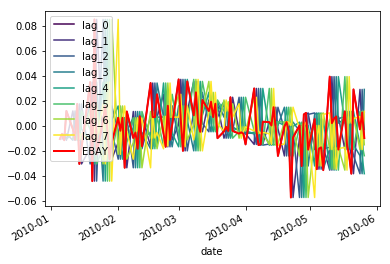

In [116]:
# Plot the first 100 samples of each
ax = many_shifts.iloc[:100].plot(cmap=plt.cm.viridis)
ebay_perc.iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

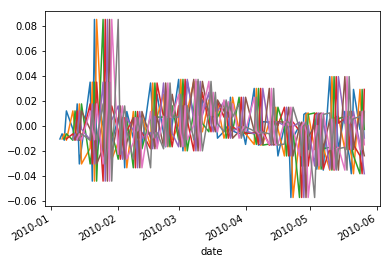

In [117]:
fig, axs = plt.subplots()
for colnr,series in many_shifts.iteritems():
    series.iloc[:100].plot()
plt.show

In [118]:
from sklearn.linear_model import Ridge
# Replace missing values with the median for each column
X = many_shifts.fillna(np.nanmedian(many_shifts))
y = data.fillna(np.nanmedian(data))

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

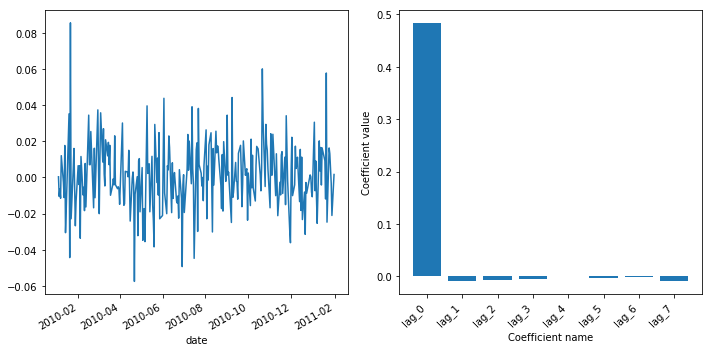

In [119]:
# Visualize the fit model coefficients
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names,coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

fig, axs = plt.subplots(1,2,figsize=(10,5))
y.loc[:'2011-01'].plot(ax=axs[0])
visualize_coefficients(model.coef_,many_shifts.columns,axs[1])
plt.tight_layout()
plt.show()

#### Caculating an auto-regression model on smoothed data

In [120]:
# percent_change is applied with a much larger window --> creates a smoother signal
ebay_perc_new = stock_data['EBAY'].rolling(window=40).aggregate(percent_change)

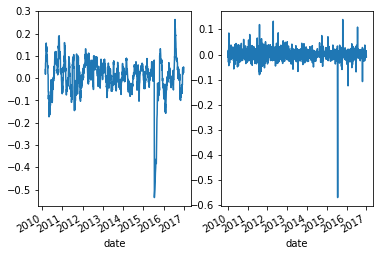

In [121]:
fig, axs = plt.subplots(1,2)
ebay_perc.plot(ax = axs[1])
ebay_perc_new.plot(ax = axs[0])

In [122]:
# data is a pandas Series containing time series data
data = pd.Series(ebay_perc_new)

# Shifts
shifts = [0, 1, 2, 3, 4, 5, 6, 7]

# Create a dictionary of time-shifted data
many_shifts = {'lag_{}'.format(ii): data.shift(ii) for ii in shifts}

# Convert them into a dataframe
many_shifts = pd.DataFrame(many_shifts)

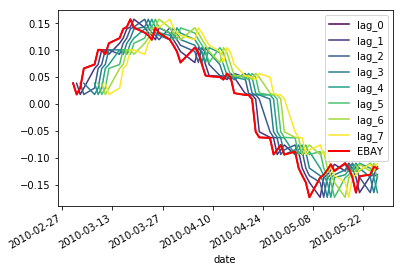

In [123]:
# Plot the first 100 samples of each
ax = many_shifts.iloc[:100].plot(cmap=plt.cm.viridis)
ebay_perc_new.iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.show()

In [124]:
# Replace missing values with the median for each column
X = many_shifts.fillna(np.nanmedian(many_shifts))
y = data.fillna(np.nanmedian(data))

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

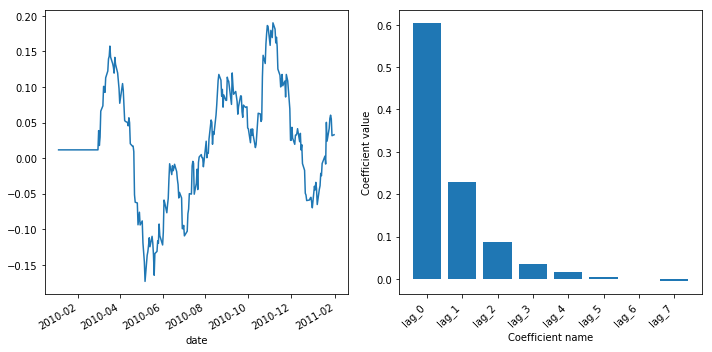

In [125]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
y.loc[:'2011-01'].plot(ax=axs[0])
visualize_coefficients(model.coef_,many_shifts.columns,axs[1])
plt.tight_layout()
plt.show()

The transformation with a larger window changed the relationship between each timepoint and the ones just before it. Now coefficients gradually go down to zero, which means that the signal itself is smoother over time. Data is not independent!

### Stationarity and Stability
* stationary timeseries do not change their statistical properties (E.g. mean, standard deviation, trends) over time
    --> hard to find, most timeseries are actually non-stationary
* most models assume stationarity of the data to some extent (i.e. that there is always the same kind of relationships between inputs and outputs --> stability of this relationship). if this relationship changes, the model predictions will not be correct (as it assumes the old relationship between inputs and outputs)
* cross-validation can be used to quantify parameter stabilty, by calculating parameters on each iteration and assessing their stability across all splits
* bootstrapping the mean to assess parameter variability: 
    - taking random samples of data with replacement, calculating their mean, repeating this, calculating the percentiles of the result (mostly 2.5, 97.5) --> results in a 95% confidence interval of the mean of each coefficient
    * assessing the stability of model performance by plotting the model's *score* over time (e.g. using TimeSeriesSplit). Is also useful to find non-stationary signals

In [ ]:
# e.g. if data are cv coefficients: shape (n_cv_folds, n_coefficients)
def bootstrap_interval(data, percentiles=(2.5, 97.5), n_boots=100):
    """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
    # Create our empty array to fill the results
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for i in range(n_boots):
        # Generate random indices for our data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[i] = random_sample.mean(axis=0)
        
    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis=0)
    return percentiles

In [ ]:
# plotting the bootstrapped coefficients
fig, ax = plt.subplots()
ax.scatter(many_shifts.columns, percentiles[0], marker='_', s=200)
ax.scatter(many_shifts.columns, percentiles[1], marker='_', s=200)

In [ ]:
# model performance over time
def my_corrcoef(est, X, y):
    """Return the correlation coefficient 
    between model predictions and a validation set."""
    return np.corrcoef(y, est.predict(X))[1, 0]

# Grab the date of the first index of each validation set
first_indices = [data.index[tt[0]] for tr, tt in cv.split(X, y)]

# Calculate the CV scores and convert to a Pandas Series
cv_scores = cross_val_score(model, X, y, cv=cv, scoring=my_corrcoef)
cv_scores = pd.Series(cv_scores, index=first_indices)

In [ ]:
# visualizing model scores over time
fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

# Calculate a rolling mean of scores over time
cv_scores_mean = cv_scores.rolling(10, min_periods=1).mean()
cv_scores.plot(ax=axs[0])
axs[0].set(title='Validation scores (correlation)', ylim=[0, 1])

# Plot the raw data
data.plot(ax=axs[1])
axs[1].set(title='Validation data')

In [ ]:
# from exercise. model scores over time aswell
from sklearn.model_selection import cross_val_score

# Generate scores for each split to see how the model performs over time
scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)

# Convert to a Pandas Series object
scores_series = pd.Series(scores, index=times_scores, name='score')

# Bootstrap a rolling confidence interval for the mean score
scores_lo = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=2.5))
scores_hi = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=97.5))

# Plot the results
fig, ax = plt.subplots()
scores_lo.plot(ax=ax, label="Lower confidence interval")
scores_hi.plot(ax=ax, label="Upper confidence interval")
ax.legend()
plt.show()

In [ ]:
# calculating variability in model coefficients
# Iterate through CV splits
n_splits = 100
cv = TimeSeriesSplit(n_splits=n_splits)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Fit the model on training data and collect the coefficients
    model.fit(X[tr], y[tr])
    coefficients[ii] = model.coef_

In [ ]:
# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients)

# Plot it
fig, ax = plt.subplots()
ax.scatter(feature_names, bootstrapped_interval[0], marker='_', lw=3)
ax.scatter(feature_names, bootstrapped_interval[1], marker='_', lw=3)
ax.set(title='95% confidence interval for model coefficients')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## What to do in case of non-stationarity?
* one option: restriction of training window size (so that only the latest timepoints are used in trainig)

In [ ]:
# Only keep the last 100 datapoints in the training data
window = 100
# Initialize the CV with this window size
cv = TimeSeriesSplit(n_splits=10, max_train_size=window)

In [ ]:
# Pre-initialize window sizes
window_sizes = [25, 50, 75, 100]

# Create an empty DataFrame to collect the stores
all_scores = pd.DataFrame(index=times_scores)

# Generate scores for each split to see how the model performs over time
for window in window_sizes:
    # Create cross-validation object using a limited lookback window
    cv = TimeSeriesSplit(n_splits=100, max_train_size=window)
    
    # Calculate scores across all CV splits and collect them in a DataFrame
    this_scores = cross_val_score(model,X,y, cv=cv, scoring=my_pearsonr)
    all_scores['Length {}'.format(window)] = this_scores

In [ ]:
# Visualize the scores
ax = all_scores.rolling(10).mean().plot(cmap=plt.cm.coolwarm)
ax.set(title='Scores for multiple windows', ylabel='Correlation (r)')
plt.show()
#notice how in some stretches of time, longer windows perform worse than 
#shorter ones. This is because the statistics in the data have changed, and the 
#longer window is now using outdated information.

# Autocorrelation (= serial correlation)
Correlation of a time series with a lagged copy of itself. Common: Lag-one autocorrelation
* Negative autocorrelation: Mean reverting
* Positive autocorrelation: Trend following, Momentum
* Example stocks: historically have negative autocorrelation when measured over e.g. a week --> strategy to buy the week's losers and sell the winners

In [ ]:
# Compute the daily change in interest rates 
daily_data['change_rates'] = daily_data.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_data['change_rates'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
annual_data = daily_data['US10Y'].resample(rule = 'A', how = 'last')

# Repeat above for annual data
annual_data['diff_rates'] = annual_data.diff()
autocorrelation_annual = annual_data['diff_rates'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_annual))

### Autocorrelation Function: The autocorrelation as a function of the lag. 
* x-axis: lag, y-axis: autocorrelation coefficient
* y =1 at lag 0 (correlation of the series with itself)

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x, lags = 20, alpha = 0.05) # x is a Series or array. alpha = width of confidence interval
# meaning of alpha = 0.05: if true autocorr is zero, there is a 5% chance it will fall outside the confidence interval
# confidence intervals (CI) are wider if alpha is lower or if there are fewer observations
# when alpha = 1 --> no CI in plot

NameError: name 'x' is not defined

In [ ]:
from  statsmodels.tsa.stattools import acf
print(acf(x))

Standard deviation of the sample autocorrelation: 1/sqrt(N_observations)
Approximation of the 95% confidence interval: +-1.96/sqrt(N_observations)

## White noise
Series with constant mean, constant variance and zero autocorrelation at all lags. If data has normal distribution --> "Gaussian White Noise"

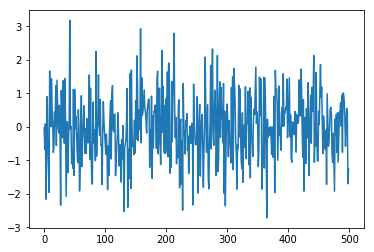

In [3]:
# generating white noise
import numpy as np
from matplotlib import pyplot as plt
noise = np.random.normal(loc=0, scale=1,size=500)
plt.plot(noise)
plt.show()

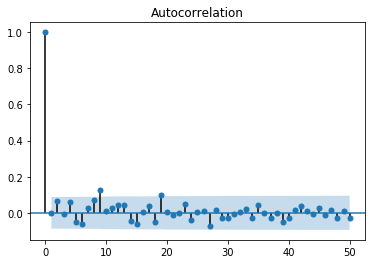

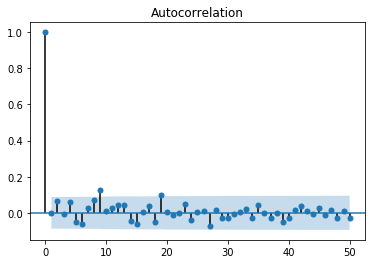

In [8]:
plot_acf(noise, lags = 50)

## Random Walk
* Random walk occurs when today's value = yesterday's value + noise --> change in value is just change in noise

    --> if stock's *prices* follow a Random Walk then stock's *returns* are white noise
    
* Random walk with drift: today's value = mu + yesterday's value + noise

    --> change in price then is white noise with non-zero mean (stocks: returns are white noise with an average return of mu)
    
* Regression test for random walk: Today's value V(t) = α + βV(t-1) + noise
    
    --> if beta < 1: *not* random walk (H1 confirmed)
    
    --> equivalent to testing whether β < 0 in V(t)-V(t-1) = α + βV(t-1) + noise (*Dickey-Fuller-Test*). With more lagged changes on the right side: Augmented Dickey-Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(x)

### Generating a random walk: 
Simulating stock prices that follow a random walk

In [25]:
steps = np.random.normal(loc=0, scale=1, size=500)
steps

array([ 2.24494739e-01,  1.55043347e+00, -1.10851531e+00,  5.26764908e-01,
        1.26978498e+00, -1.37731632e-01, -1.16915544e-02, -2.72463440e-01,
        1.42033029e+00, -1.50647410e+00,  1.40955101e-01, -2.18789672e-01,
        7.08376783e-01,  4.27649619e-01,  2.41410119e-02,  7.36427000e-01,
       -4.59775469e-01, -1.50677324e+00, -3.96761460e-01,  1.60126805e-01,
        7.05815123e-01,  5.07314745e-01,  4.49784419e-01,  1.22709891e+00,
       -8.88453605e-01,  9.80584072e-02,  9.19212724e-01, -3.36823705e-01,
       -9.04109934e-01, -4.23752152e-01,  1.49473775e+00, -1.12507994e+00,
        1.08885184e+00, -5.56929288e-01, -1.15413559e-01, -5.34313573e-01,
        1.85410748e+00,  2.42514081e-01,  1.12459627e+00, -4.52221815e-01,
       -4.67789669e-01,  1.39997006e+00, -2.40142132e-01, -1.97182585e-01,
        3.88572386e-01, -9.79448237e-01, -5.49917788e-01, -8.45347577e-02,
        1.25269308e+00,  1.63818370e+00, -5.11670670e-02, -2.39183986e+00,
        2.06125704e+00,  

In [26]:
# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

In [27]:
np.cumsum(steps)

array([  0.        ,   1.55043347,   0.44191816,   0.96868307,
         2.23846805,   2.10073642,   2.08904486,   1.81658142,
         3.23691171,   1.73043761,   1.87139271,   1.65260304,
         2.36097983,   2.78862944,   2.81277046,   3.54919746,
         3.08942199,   1.58264875,   1.18588729,   1.34601409,
         2.05182922,   2.55914396,   3.00892838,   4.23602728,
         3.34757368,   3.44563209,   4.36484481,   4.02802111,
         3.12391117,   2.70015902,   4.19489677,   3.06981683,
         4.15866867,   3.60173939,   3.48632583,   2.95201225,
         4.80611973,   5.04863381,   6.17323008,   5.72100827,
         5.2532186 ,   6.65318866,   6.41304653,   6.21586394,
         6.60443633,   5.62498809,   5.0750703 ,   4.99053555,
         6.24322863,   7.88141233,   7.83024526,   5.4384054 ,
         7.49966244,   8.71263097,   7.96990712,   7.63726684,
         9.08430585,   9.42265866,   9.92001066,   9.09456954,
         8.55125244,   8.16297536,   8.41491873,   9.39

In [42]:
# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)
P

array([101.        , 102.00851789, 103.01476204, 104.02862184,
       105.03013553, 106.0452846 , 107.04312194, 108.0595173 ,
       109.07128835, 110.08076634, 111.07994323, 112.0637614 ,
       113.06647796, 114.05680372, 115.06762781, 116.05111589,
       117.05196086, 118.06603859, 119.05014911, 120.05244887,
       121.06419103, 122.06293528, 123.07672798, 124.07443236,
       125.07195046, 126.06846097, 127.07607012, 128.08392348,
       129.09288416, 130.08977619, 131.09645675, 132.09844154,
       133.11076404, 134.12348601, 135.1249783 , 136.12030592,
       137.10473484, 138.11122609, 139.11934877, 140.12781225,
       141.1344049 , 142.137016  , 143.16159605, 144.17761096,
       145.17943021, 146.15038507, 147.15626844, 148.16617313,
       149.15354766, 150.16025497, 151.17446736, 152.16849688,
       153.17707117, 154.19053009, 155.18406961, 156.17450768,
       157.16255554, 158.16276118, 159.15227014, 160.14268084,
       161.1504063 , 162.15984228, 163.15042339, 164.15

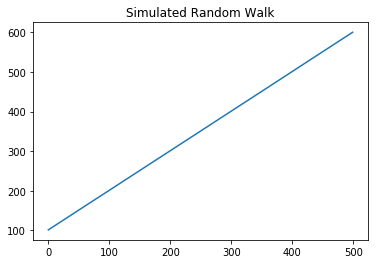

In [43]:
# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### Genrating random walk with drift
In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add 1 to the random, normal changes to get a total return, and multiply that by the last price

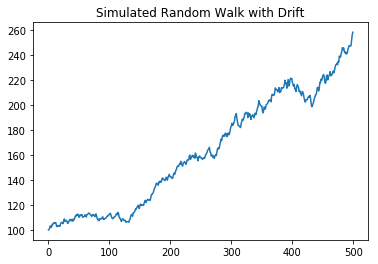

In [44]:
# Generate 500 random steps
steps = np.random.normal(loc=.001, scale=0.01, size=500) + 1
#print("steps:",steps)
# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

### Testing whether a timeseries follows a random walk

In [45]:
from statsmodels.tsa.stattools import adfuller
# H0 is that the series follows a random walk. If p < 0.05, we can reject H0 and assume that there 
# is an underlying pattern in series (i.e. it can be predicted from its past values)
# the adfuller test here is done on absolute prices (not returns)
results = adfuller(P)
print('The p-value of the test on prices is: ' + str(results[1]))

The p-value of the test on prices is: 0.9959323423719606


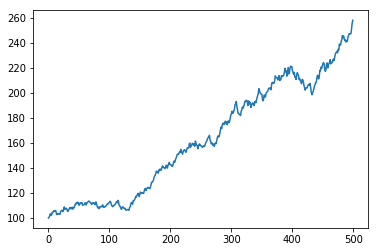

In [50]:
import pandas as pd
# now let's do the Adfuller test on returns instead of prices
P = pd.DataFrame(P,columns=["P"])
plt.plot(P)

In [48]:
P_ret = P.pct_change()

# Eliminate the NaN in the first row of returns
P_ret = P_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(P_ret['P'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 0.0


In [49]:
results

(-22.1800092662488,
 0.0,
 0,
 498,
 {'1%': -3.4435494520411605,
  '5%': -2.8673612117611267,
  '10%': -2.5698704830567247},
 -3079.3313616830937)

### Stationarity
* strong stationarity: entire data distribution is time-invariant
* weak stationarity: mean, variance and autocorrelation are time-invariant. Corr(Xt, Xt-Tau) is only a function of Tau, not a function of time
* why is non-stationarity a problem? Because if parameters vary with time, there are too many parameters to estimate in our model (parsimonious models have few parameters)
* random walk = common type of non-stationary series
* seasonality in series is another example of non-stationary series
* transforming non-stationary series to stationary ones: 
        - e.g. random_walk_series.diff() --> first differences results in white noise
        - e.g. seasonality pattern with 4 time points per year --> .diff(4) --> seasonal adjustment (removing seasonal component of a time series). Lag corresponds to the periodicity
        - sometimes, several transformations are necessary: e.g. log and then .diff()

# Autoregressive Models

AR(1) model = model of order 1: R(t) = mu +  Φ R(t-1) + noise
* if  Φ = 1, the process is a random walk. if  Φ = 0, the process is white noise
* -1 <  Φ < 1 for the process to be stationary
* negative  Φ --> mean reversion (looks noisy). positive  Φ --> momentum (looks like random walk)
* autocorrelation decays exponentially at a rate of Φ (for negative Φ, signs are reversed at each step). E.g. if Φ = 0.9 at lag 1, the lag 2 autocorrelation is 0.9 * 0.9. If Φ = -0.9 at lag 1, the lag 2 autocorrelation is .81, lag 3 - 0.729 etc.
* model can be extended to include more lags: R(t-2), R(t-3) etc.

### Simulation of an AR process

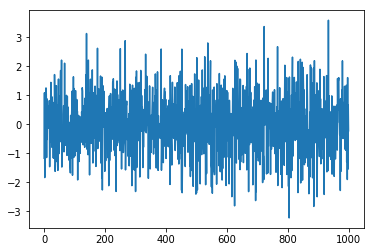

In [78]:
from statsmodels.tsa.arima_process import ArmaProcess
# phi is + 0.9 here!
ar = np.array([1, 0.3]) # zero-lag coefficient 1 must be included at first place, and sign of 0.9 must be reversed
ma = np.array([1])
AR_object = ArmaProcess(ar,ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [79]:
#simulated_data = pd.Series(simulated_data)
#simulated_data.index

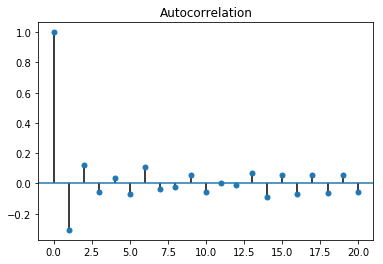

In [80]:
plot_acf(simulated_data, alpha=1, lags=20)
plt.show()

## Estimating and forecasting AR models

In [81]:
# estimating parameters from data
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data, order = (1,0))
result = mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1438.033
Method:                       css-mle   S.D. of innovations              1.019
Date:                Mon, 05 Nov 2018   AIC                           2882.066
Time:                        13:25:00   BIC                           2896.789
Sample:                             0   HQIC                          2887.662
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0175      0.025      0.710      0.478      -0.031       0.066
ar.L1.y       -0.3074      0.030    -10.217      0.000      -0.366      -0.248
                                    Roots           

In [82]:
print(result.params) # returns only the coefficients

[ 0.01749762 -0.30744485]


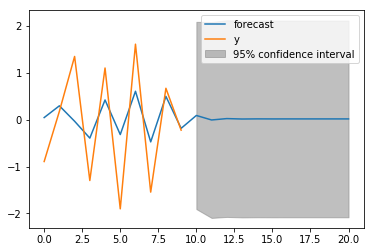

In [83]:
# forecasting
result.plot_predict(start = 990, end = 1010)
plt.show()

Note: when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean.

sometimes it is hard to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, e.g. a random walk (e.g. interest rate data ACF looks very similar to simulated random walk ACF)

### Identifying the order of an AR model
* partial autocorrelation function (PACF): measures incremental benefit of adding another lag --> function plot_pacf(x, lags = 20, alpha = 0.05). E.g. white noise: no lags are significantly different from zero
* information criteria: takes into account number of parameters used (to avoid overfitting.They compute the goodness-of-fit with the estimated parameters but apply a penalty function on the number of parameters in the model
    - Akaike Information Criterion (AIC)
    - Bayesian Information Criterion (BIC)
    --> usage: fit several models with varying number of parameters, choose the model with the lowest BIC

In [86]:
print(result.aic)
print(result.bic)

2882.0659976311404
2896.7892634680866


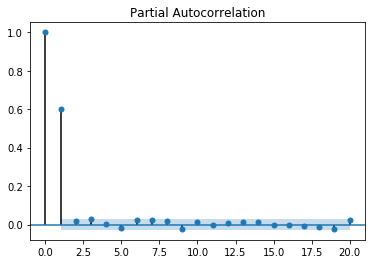

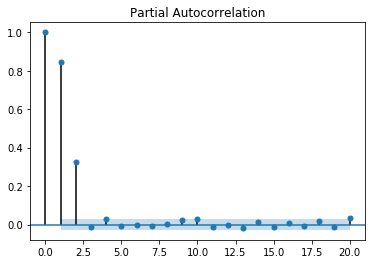

In [87]:
# Using PACF to estimate the order of a model
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

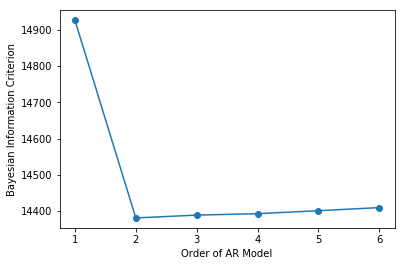

In [88]:
# Using information criteria to estimate order of a model
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# Moving Average Models
R(t) = mu + ϵ(t)1 + θ(ϵ(t-1))
* today's value = mean + noise + a fraction theta of yesterday's noise
* MA(1) model: only one lagged error on the right side
* if θ = 0 --> process is white noise
* MA values are stationary for all values of theta
interpretation of θ for MA(1):
* θ negative --> one-period mean reversion. e.g. shock last period caused last period's return to be positive, but this period's return is more likely to be negative. shock two periods ago would have no effect on today's return (as it is a MA(1) model)
* θ positive --> one-period momentum
* lag 1 autocorrelation is not θ, but θ/(1+θ ** 2)
* example of MA(1) process: intraday stock returns (high frequency stock data)
* MA can be extended to more lags by adding e.g θ(ϵ(t-2))
* MA(1) model has not autocorrelation beyond lag1, MA(2) none beyond lag2 etc.. (unlike AR(1) 
    - e.g.  if the MA parameter, θ, is = +0.9, the first-lag autocorrelation will be 0.9/(1+(0.9)2)=0.497, and the autocorrelation at all other lags will be zero

### Simulating an MA process

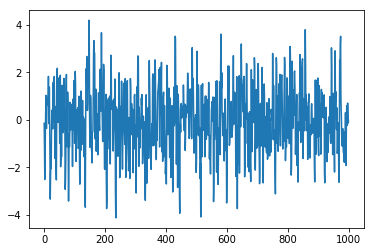

In [90]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1])
ma = np.array([1, 0.9]) # 0.9 is theta for lag 1. no need to reverse the sign of theta here
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)
plt.show()

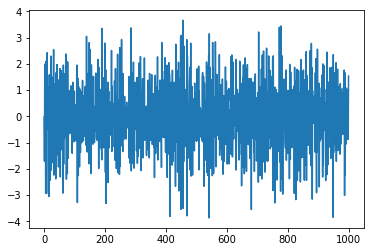

In [98]:
ma2 = np.array([1, -0.9]) 
AR_object2 = ArmaProcess(ar, ma2)
simulated_data2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data2)
plt.show()

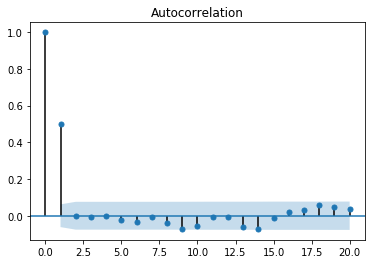

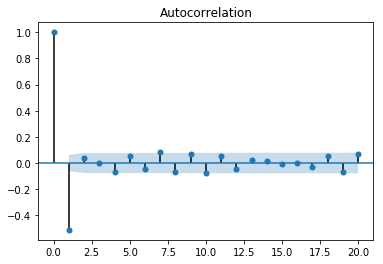

In [99]:
plot_acf(simulated_data, lags=20)
plt.show()
plot_acf(simulated_data2, lags=20)
plt.show()

### Estimating and forecasting MA models

In [105]:
# estimating a model
mod = ARMA(simulated_data, order=(0,1))
res = mod.fit()
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1434.355
Method:                       css-mle   S.D. of innovations              1.015
Date:                Mon, 05 Nov 2018   AIC                           2874.710
Time:                        15:15:07   BIC                           2889.433
Sample:                             0   HQIC                          2880.306
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0409      0.061     -0.672      0.502      -0.160       0.078
ma.L1.y        0.8988      0.013     69.213      0.000       0.873       0.924
                                    Roots           

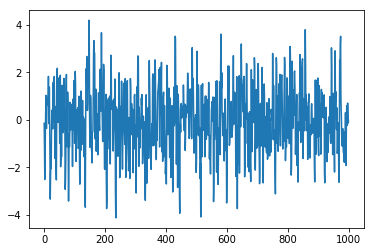

In [101]:
plt.plot(simulated_data)

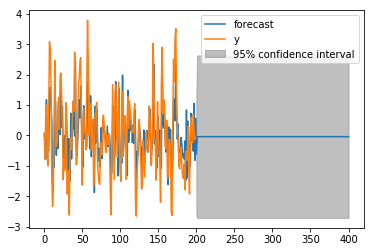

In [103]:
mod = ARMA(simulated_data,order=(0,1))
result = mod.fit()
result.plot_predict(start=800,end=1200)
plt.show()

Note: with an MA(1) model, unlike an AR model, all forecasts beyond the one-step ahead forecast will be the same

## ARMA and ARIMA models
* formula for ARMA(1,1) model: R(t) = mu + Φ R(t-1)+ ϵ(t) + θ(ϵ(t-1))
* AR(1) can be converted to MA(infinity) model by replacing R(t-1) by mu + R(t-2) + ϵ(t-1), then replacing R(t-2) and so forth


In [ ]:
# cleaning data up
# 0      1
#0  a1504272600  8.290
#1            1  8.270
#2            2  8.280
#3            3  8.275
# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

#handling missing data
When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. You can fill in the missing rows with the .reindex() method, convert the index to time of day, and then plot the data.

In [ ]:
# Notice that some rows are missing
print("The length of the DataFrame is: ",len(intraday))

# Find the missing rows
print("Missing rows: ", set(range(391)) - set(intraday.index))
print(intraday.index)
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-08-28 9:30', end='2017-08-28 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

In [ ]:
# fitting an ma(1) model to intraday stock data

# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns,lags = 60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

Equivalence of AR(1) and MA(infinity)

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA(∞

) model with the appropriate parameters.

You will simulate an MA model with parameters 0.8,0.8** 2,0.8** 3,…
for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with ϕ=0.8.

In [ ]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list of MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

# Cointegration models
* if two series P(t) and Q(t) are random walks, their linear combination (P(t) - c(Q(t))) may still not be a random walk! In that case, their linear combination is forecastable and P(t) and Q(t) are called 'cointegrated'
        --> analogy: dog owner walking his dog on a retractable leash. if dog falls behind, it gets pulled forward. if it gets too far ahead, it gets pulled back. both series look like a random walk, but the difference between them looks mean reverting
* example: heating oil and natural gas prices. Their difference looks mean reverting
* economic substitutes are often cointegrated (e.g. wheat and corn, corn and sugar, bitcoin and ethereum)
### Testing for cointegration
* regress P(t) on Q(t) and get slope c
* run augmented dickey-fuller test on the linear combination of P(t) and Q(t)
* statsmodel's function coint(P,Q)

In [ ]:
from statsmodels.tsa.stattools import coint
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [ ]:
# Applying the dickey-fuller test to the difference between heating oil and natural gas.
# significant p-value means that the difference is not a random walk
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG =adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

question: is adfuller done on absolute prices or pct change? (with pct change, it would be signifinat)

Are Bitcoin and Ethereum Cointegrated?

Cointegration involves two steps: regressing one time series on the other to get the cointegration vector, and then perform an ADF test on the residuals of the regression. In the last example, there was no need to perform the first step since we implicitly assumed the cointegration vector was (1,−1)

. In other words, we took the difference between the two series (after doing a units conversion). Here, you will do both steps.

You will regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). If we call the regression coefficient b
, then the cointegration vector is simply (1,−b). Then perform the ADF test on BTC −b ETH. Bitcoin and Ethereum prices are pre-loaded in DataFrames BTC and ETH.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

# Analyzing temperature data
Procedure:
* test for random walk
* take first difference
* compute acf and pacf
* fit a few AR, MA and ARMA models
* use information criterion to choose best model
* forecast temperature over next 30 years

is there a differnce between using .diff() .pct_change()? Only the scale is different but series look the same; results of acf and pacf are the same for both.

In [ ]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1]) # the p-value is .58 --> it is a random walk

Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

In [ ]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()

chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])


# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])

plt.show()

Fit the temperature data to an AR(1), AR(2), MA(1), and ARMA(1,1) and see which model is the best fit, using the AIC criterion.

In [ ]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(chg_temp, order=(1,1))
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. You will use the ARIMA module on the temperature data, pre-loaded in the DataFrame temp_NY, but the forecast would be the same as using the ARMA module on changes in temperature, and then using cumulative sums of these changes to get the temperature. 

In [ ]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast interest rates using an AR(1) model
mod = ARIMA(temp_NY, order=(1,1,1)) # The d in order(p,d,q) is one, since we first differenced once
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()